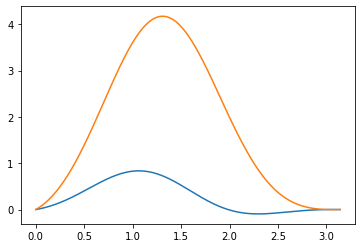

6E-01 8E-01 8E-01 9E-01 5E-01 5E-01 5E-01 5E-01 5E-01 5E-01 5E-01 5E-01 5E-01 5E-01 5E-01 5E-01 5E-01 5E-01 8E-01 5E-01 5E-01 5E-01 4E-01 5E-01 4E-01 4E-01 4E-01 4E-01 4E-01 4E-01 4E-01 4E-01 4E-01 4E-01 4E-01 5E-01 4E-01 4E-01 4E-01 4E-01 5E-01 4E-01 4E-01 4E-01 4E-01 4E-01 4E-01 
Initial params: goal = 6E-01 
 [[[0.40283279 0.31687563 0.84429155]
  [0.01989229 0.12852783 0.35271994]
  [0.13015474 0.29448177 0.31003324]
  [0.24989433 0.03114848 0.55408435]
  [0.1216955  0.04389063 0.69896935]
  [0.35588029 0.16409038 0.35834349]
  [0.32954359 0.21399604 0.7913198 ]
  [0.03678519 0.14413586 0.84737067]
  [0.12033066 0.1548159  0.86940866]
  [0.03206022 0.30761064 0.88288235]]

 [[0.27774856 0.06435535 0.61638003]
  [0.85911968 0.25811951 0.88663066]
  [0.12253413 0.26336973 0.59549537]
  [0.7632926  0.10752095 0.55159358]
  [0.92273403 0.149541   0.1578949 ]
  [0.84322133 0.13362605 0.34546803]
  [0.74522753 0.16392839 0.72773306]
  [0.67587104 0.2415455  0.53652746]
  [0.49309549 0.17

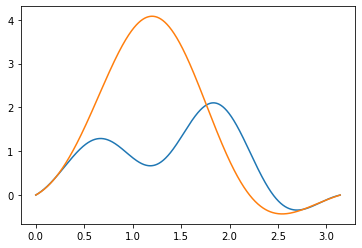

UnboundLocalError: local variable 'goal' referenced before assignment

In [1]:

import autograd.numpy as np
import scipy
from qutip import qeye, sigmax, sigmay, tensor, fock
from tested.getCtrl import getCtrl, pltCtrl
from tested.getFid import getFid
from tested.minimize import minimize, test

#test()

def outer(a,b): return a*b.dag()
def sigx(j,k): return  outer(k,j) + outer(j,k)
def sigy(j,k): return (outer(k,j) - outer(j,k)) * 1j
def H0j(j,N,delta,lam):
    ka = fock(N, j-1); kb = fock(N, j)
    return delta[j] * outer(kb,kb) 
def Hxj(j,N,delta,lam):
    ka = fock(N, j-1); kb = fock(N, j)
    return 1/2 * lam[j] * sigx(ka,kb)
def Hyj(j,N,delta,lam):
    ka = fock(N, j-1); kb = fock(N, j)
    return 1/2 * lam[j] * sigy(ka,kb)
def H0(N,delta,lam): return sum([H0j(j,N,delta,lam) for j in range(1,N)])
def Hx(N,delta,lam): return sum([Hxj(j,N,delta,lam) for j in range(1,N)])
def Hy(N,delta,lam): return sum([Hyj(j,N,delta,lam) for j in range(1,N)])

lam2 = np.sqrt(2)    # relative strength of the 0 − 1 to 1 − 2 transition
lam=[None, 1, lam2, lam2**2]

Delta= -2*np.pi * 0.4    # anharmonicity: −0.4 GHz 
del1 = 0
del2 = Delta + del1
del3 = Delta + del2
delta=[None, del1, del2, del3]

N=4   # dimension

a0 = np.random.rand(2, 10, 3)
T = np.pi
a0[:,:,1] /= T
pltCtrl(a0, T)
U0 = np.array(qeye(N).full())
Ugoal = np.array(tensor(sigmax(), qeye(N-2)).full())
H0 = np.array(H0(N,delta,lam))
Hcs = [np.array(Hx(N,delta,lam).full()), np.array(Hy(N,delta,lam).full())]
def Hat(a,t):
    c = getCtrl(a, t, T) + 1e-3
    return sum([ c[i]*Hcs[i] for i in range(len(Hcs)) ])
def goalFunc(U):
    fid = getFid(Ugoal, U)
    return 1 - fid
def callback(a):
    pltCtrl(a, T)
a = minimize(a0, U0, Hat, T, goalFunc, callback)
 